In [15]:
import pandas as pd
import numpy as np

%matplotlib inline

data = pd.read_csv('assets/datasets/train.csv')
data.set_index('Date', inplace=True)
data.head()

Store  Dept  Weekly_Sales IsHoliday
Date                                           
2010-02-05      1     1      24924.50     False
2010-02-12      1     1      46039.49      True
2010-02-19      1     1      41595.55     False
2010-02-26      1     1      19403.54     False
2010-03-05      1     1      21827.90     False

In [22]:
data[data.Store==1].sort_index

<bound method DataFrame.sort_index of             Store  Dept  Weekly_Sales IsHoliday
Date                                           
2010-02-05      1     1      24924.50     False
2010-02-12      1     1      46039.49      True
2010-02-19      1     1      41595.55     False
2010-02-26      1     1      19403.54     False
2010-03-05      1     1      21827.90     False
2010-03-12      1     1      21043.39     False
2010-03-19      1     1      22136.64     False
2010-03-26      1     1      26229.21     False
2010-04-02      1     1      57258.43     False
2010-04-09      1     1      42960.91     False
2010-04-16      1     1      17596.96     False
2010-04-23      1     1      16145.35     False
2010-04-30      1     1      16555.11     False
2010-05-07      1     1      17413.94     False
2010-05-14      1     1      18926.74     False
2010-05-21      1     1      14773.04     False
2010-05-28      1     1      15580.43     False
2010-06-04      1     1      17558.09     False
20

#### Deliverable

Look back at the readme from wednesday's lecture on timeseries for good information about these models and acf/pacf plots!

- Filter the dataframe to Store 1 sales and aggregate over departments to compute the total sales per store.

In [70]:
# data.index = pd.to_datetime(data.index)
store1 = data[data.Store==1]
store1 = pd.DataFrame(store1['Weekly_Sales'].resample('1D').sum(),columns=['Weekly_Sales'])
store1.dropna(inplace=True)

In [72]:
store1.head()

Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68

- Plot the rolling_mean for Weekly_Sales. What general trends do you observe?

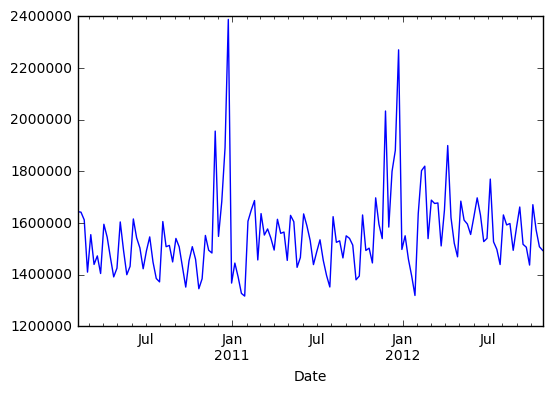

In [78]:
store1['Weekly_Sales'].rolling(window=1).mean().plot()

It's pretty unsurprising to see that sales jump right before January--Christmas.

- Compute the 1, 2, 52 autocorrelations for Weekly_Sales and create an autocorrelation and partial autocorrelation plot.

In [ ]:
store1.Weekly_Sales.autocorr(lag=1) #previous week = 0.30215827941131262
store1.Weekly_Sales.autocorr(lag=2) #2 weeks prior = 0.12741313055390105
store1.Weekly_Sales.autocorr(lag=52) #previous year = 0.89537602947770101

We can see from the autocorrelation values that the weekly_sales are highly correlated with the sales from the year leading up to that week

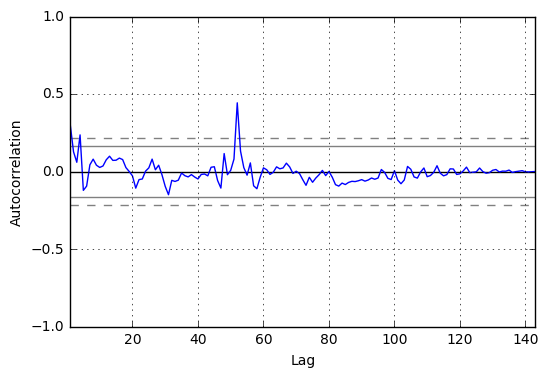

In [92]:
from pandas.tools.plotting import autocorrelation_plot

autocorrelation_plot(store1['Weekly_Sales'])

This chart also shows that around week 52, the autocorrelation is highest.

- BONUS: What do the acf() and pacf() plots say about the type of model you want to build?

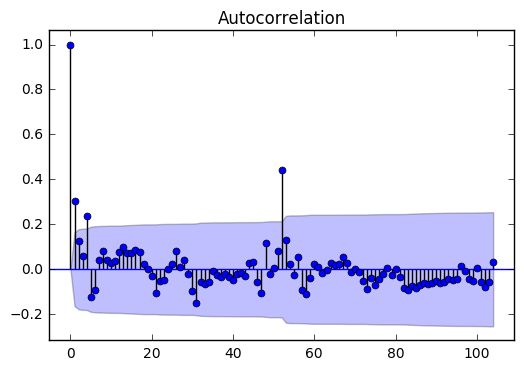

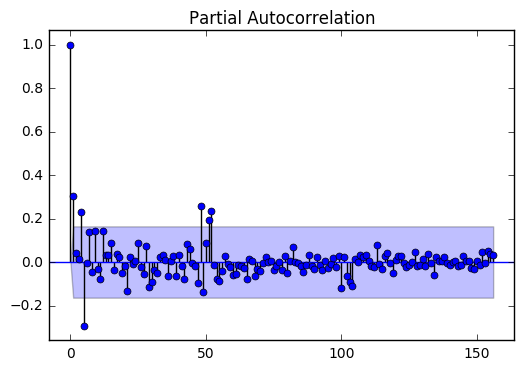

In [103]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

plot_acf(store1.Weekly_Sales, lags=52*2)
plt.show()

plot_pacf(store1.Weekly_Sales, lags=52*3)
plt.show()

# These plots tell us how many p's and q's we need

- "Difference" the data by converting the sales into change in sales (diff function is convenient for doing this.)
- Split the weekly sales data in a training and test set - using 75% of the data for training.

In [156]:
# store1_diff = store1.diff(periods=1)
# store1_diff.fillna(0,inplace=True)

X_train = store1_diff[0:107]
X_test = store1_diff[107:]


- Create an AR(1) model on the training data and compute the mean absolute error of the predictions. How effective is this model?


In [157]:
from statsmodels.tsa.arima_model import ARMA

model = ARMA(store1_diff, (1, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(1, 0)   Log Likelihood               -1925.240
Method:                       css-mle   S.D. of innovations         170033.900
Date:                Tue, 02 May 2017   AIC                           3856.480
Time:                        14:20:10   BIC                           3865.368
Sample:                    02-05-2010   HQIC                          3860.092
                         - 10-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const              -1049.1690   1.04e+04     -0.101      0.920     -2.14e+04  1.93e+04
ar.L1.Weekly_Sales    -0.3731      0.077     -4.836      0.000        -0.524    -0.222
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.6803           +0.0000j            2.6803            0.5000
-----------------------------------------------------------------------------
"""

- Plot the residuals - where are their significant errors?


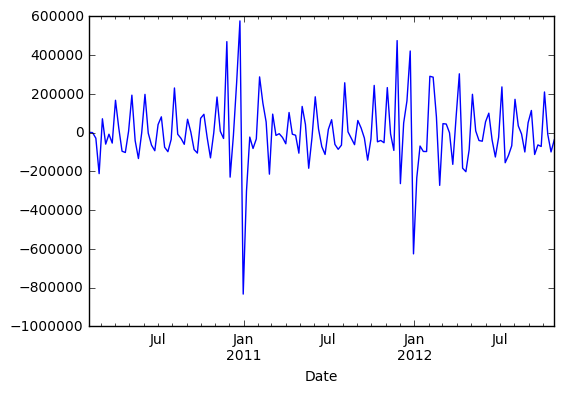

In [158]:
model.resid.plot()

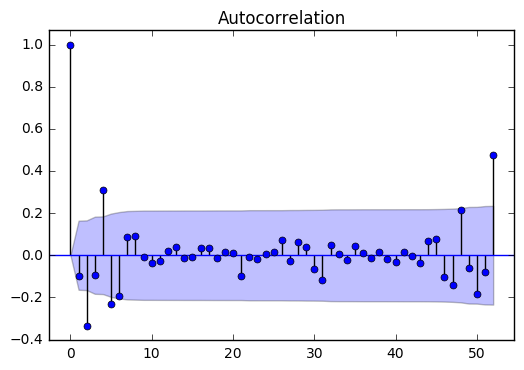

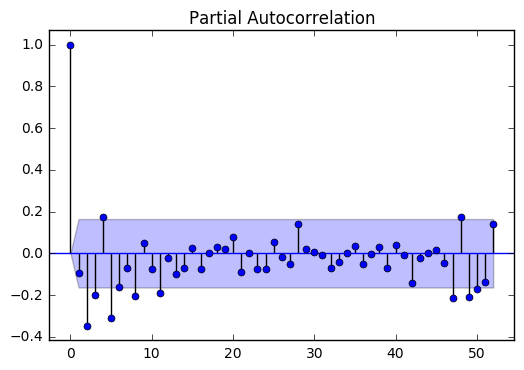

In [159]:

plot_acf(model.resid, lags=52)
plt.show()

plot_pacf(model.resid, lags=52)
plt.show()


- Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set?

In [160]:
# AR(2)
model = ARMA(store1_diff, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(2, 0)   Log Likelihood               -1920.592
Method:                       css-mle   S.D. of innovations         164521.872
Date:                Tue, 02 May 2017   AIC                           3849.184
Time:                        15:03:46   BIC                           3861.035
Sample:                    02-05-2010   HQIC                          3854.000
                         - 10-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const              -1049.1690   8046.252     -0.130      0.896     -1.68e+04  1.47e+04
ar.L1.Weekly_Sales    -0.4674      0.081     -5.792      0.000        -0.626    -0.309
ar.L2.Weekly_Sales    -0.2492      0.080     -3.103      0.002        -0.407    -0.092
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9377           -1.7700j            2.0031           -0.3275
AR.2           -0.9377           +1.7700j            2.0031            0.3275
-----------------------------------------------------------------------------
"""

In [161]:
model = ARMA(store1_diff, (2, 2)).fit()
model.summary()

/Users/jennydoyle/anaconda/lib/python3.5/site-packages/statsmodels/base/model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                     ARMA(2, 2)   Log Likelihood               -1904.632
Method:                       css-mle   S.D. of innovations         145070.753
Date:                Tue, 02 May 2017   AIC                           3821.265
Time:                        15:04:09   BIC                           3839.042
Sample:                    02-05-2010   HQIC                          3828.488
                         - 10-26-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const                725.9460    425.538      1.706      0.090      -108.094  1559.986
ar.L1.Weekly_Sales    -0.5207      0.163     -3.198      0.002        -0.840    -0.202
ar.L2.Weekly_Sales     0.3076      0.081      3.778      0.000         0.148     0.467
ma.L1.Weekly_Sales    -0.2067      0.154     -1.342      0.182        -0.509     0.095
ma.L2.Weekly_Sales    -0.7932      0.154     -5.167      0.000        -1.094    -0.492
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1454           +0.0000j            1.1454            0.5000
AR.2            2.8384           +0.0000j            2.8384            0.0000
MA.1            1.0001           +0.0000j            1.0001            0.0000
MA.2           -1.2607           +0.0000j            1.2607            0.5000
-----------------------------------------------------------------------------
"""

- Assemble your findings, including any useful graphs.